In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.dates import DateFormatter

plt.style.use("fivethirtyeight")

In [3]:
resultados = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\f1results.csv")
resultados.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [4]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         23777 non-null  int64  
 1   raceId           23777 non-null  int64  
 2   driverId         23777 non-null  int64  
 3   constructorId    23777 non-null  int64  
 4   number           23771 non-null  float64
 5   grid             23777 non-null  int64  
 6   position         13227 non-null  float64
 7   positionText     23777 non-null  object 
 8   positionOrder    23777 non-null  int64  
 9   points           23777 non-null  float64
 10  laps             23777 non-null  int64  
 11  time             6004 non-null   object 
 12  milliseconds     6003 non-null   float64
 13  fastestLap       5383 non-null   float64
 14  rank             5531 non-null   float64
 15  fastestLapTime   5383 non-null   object 
 16  fastestLapSpeed  5383 non-null   object 
 17  statusId    

In [5]:
resultados["fastestLapSpeed"] = pd.to_numeric(resultados["fastestLapSpeed"], errors="coerce")

In [6]:
resultados["fastestLapTime"] = pd.to_datetime(resultados["fastestLapTime"], errors="coerce", format="%H:%M.%S").dt.time

In [7]:
carreras = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\races.csv")
carreras.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [8]:
carreras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     997 non-null    int64 
 1   year       997 non-null    int64 
 2   round      997 non-null    int64 
 3   circuitId  997 non-null    int64 
 4   name       997 non-null    object
 5   date       997 non-null    object
 6   time       266 non-null    object
 7   url        997 non-null    object
dtypes: int64(4), object(4)
memory usage: 62.4+ KB


In [9]:
carreras["date"] = pd.to_datetime(carreras["date"], format="%Y-%m-%d")

In [10]:
carreras["name"] = carreras["name"].str.replace(" Grand Prix", "")

In [11]:
resultados_filtrados = resultados.drop(columns=["time", "fastestLapTime"])
carreras_filtrados = carreras.drop(columns=["time", "url"])
resultados_2 = pd.merge(resultados_filtrados, carreras_filtrados, on="raceId", how="left")
resultados_2

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,year,round,circuitId,name,date
0,1,18,1,1,22.0,1,1.0,1,1,10.0,...,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian,2008-03-16
1,2,18,2,2,3.0,5,2.0,2,2,8.0,...,5696094.0,41.0,3.0,217.586,1,2008,1,1,Australian,2008-03-16
2,3,18,3,3,7.0,7,3.0,3,3,6.0,...,5698779.0,41.0,5.0,216.719,1,2008,1,1,Australian,2008-03-16
3,4,18,4,4,5.0,11,4.0,4,4,5.0,...,5707797.0,58.0,7.0,215.464,1,2008,1,1,Australian,2008-03-16
4,5,18,5,1,23.0,3,5.0,5,5,4.0,...,5708630.0,43.0,1.0,218.385,1,2008,1,1,Australian,2008-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777,988,842,5,10.0,17,16.0,16,16,0.0,...,NaN,33.0,16.0,192.542,11,2017,20,24,Abu Dhabi,2017-11-26
23773,23778,988,828,15,9.0,19,17.0,17,17,0.0,...,NaN,36.0,15.0,193.057,11,2017,20,24,Abu Dhabi,2017-11-26
23774,23779,988,840,3,18.0,15,18.0,18,18,0.0,...,NaN,52.0,6.0,195.402,11,2017,20,24,Abu Dhabi,2017-11-26
23775,23780,988,832,4,55.0,12,NaN,R,19,0.0,...,NaN,26.0,14.0,193.410,36,2017,20,24,Abu Dhabi,2017-11-26


In [12]:
circuitos = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\circuits.csv", encoding="ISO-8859-1")
circuitos.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÌ_,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park


In [13]:
circuitos_filtrados = circuitos.drop(columns="url")

In [14]:
carreras_filtrados = pd.merge(carreras_filtrados, circuitos_filtrados, on="circuitId", how="left")

In [51]:
vel_circs = resultados_2.groupby(["name", "year"])["fastestLapSpeed"].median().reset_index()
vel_circs = vel_circs[vel_circs["year"] > 2004]

name
Abu Dhabi         9
Australian       13
Austrian          4
Azerbaijan        1
Bahrain          12
Belgian          12
Brazilian        13
British          13
Canadian         12
Chinese          13
European          9
French            4
German           10
Hungarian        13
Indian            3
Italian          13
Japanese         13
Korean            4
Malaysian        13
Mexican           3
Monaco           13
Russian           4
San Marino        2
Singapore        10
Spanish          13
Turkish           7
United States     9
dtype: int64

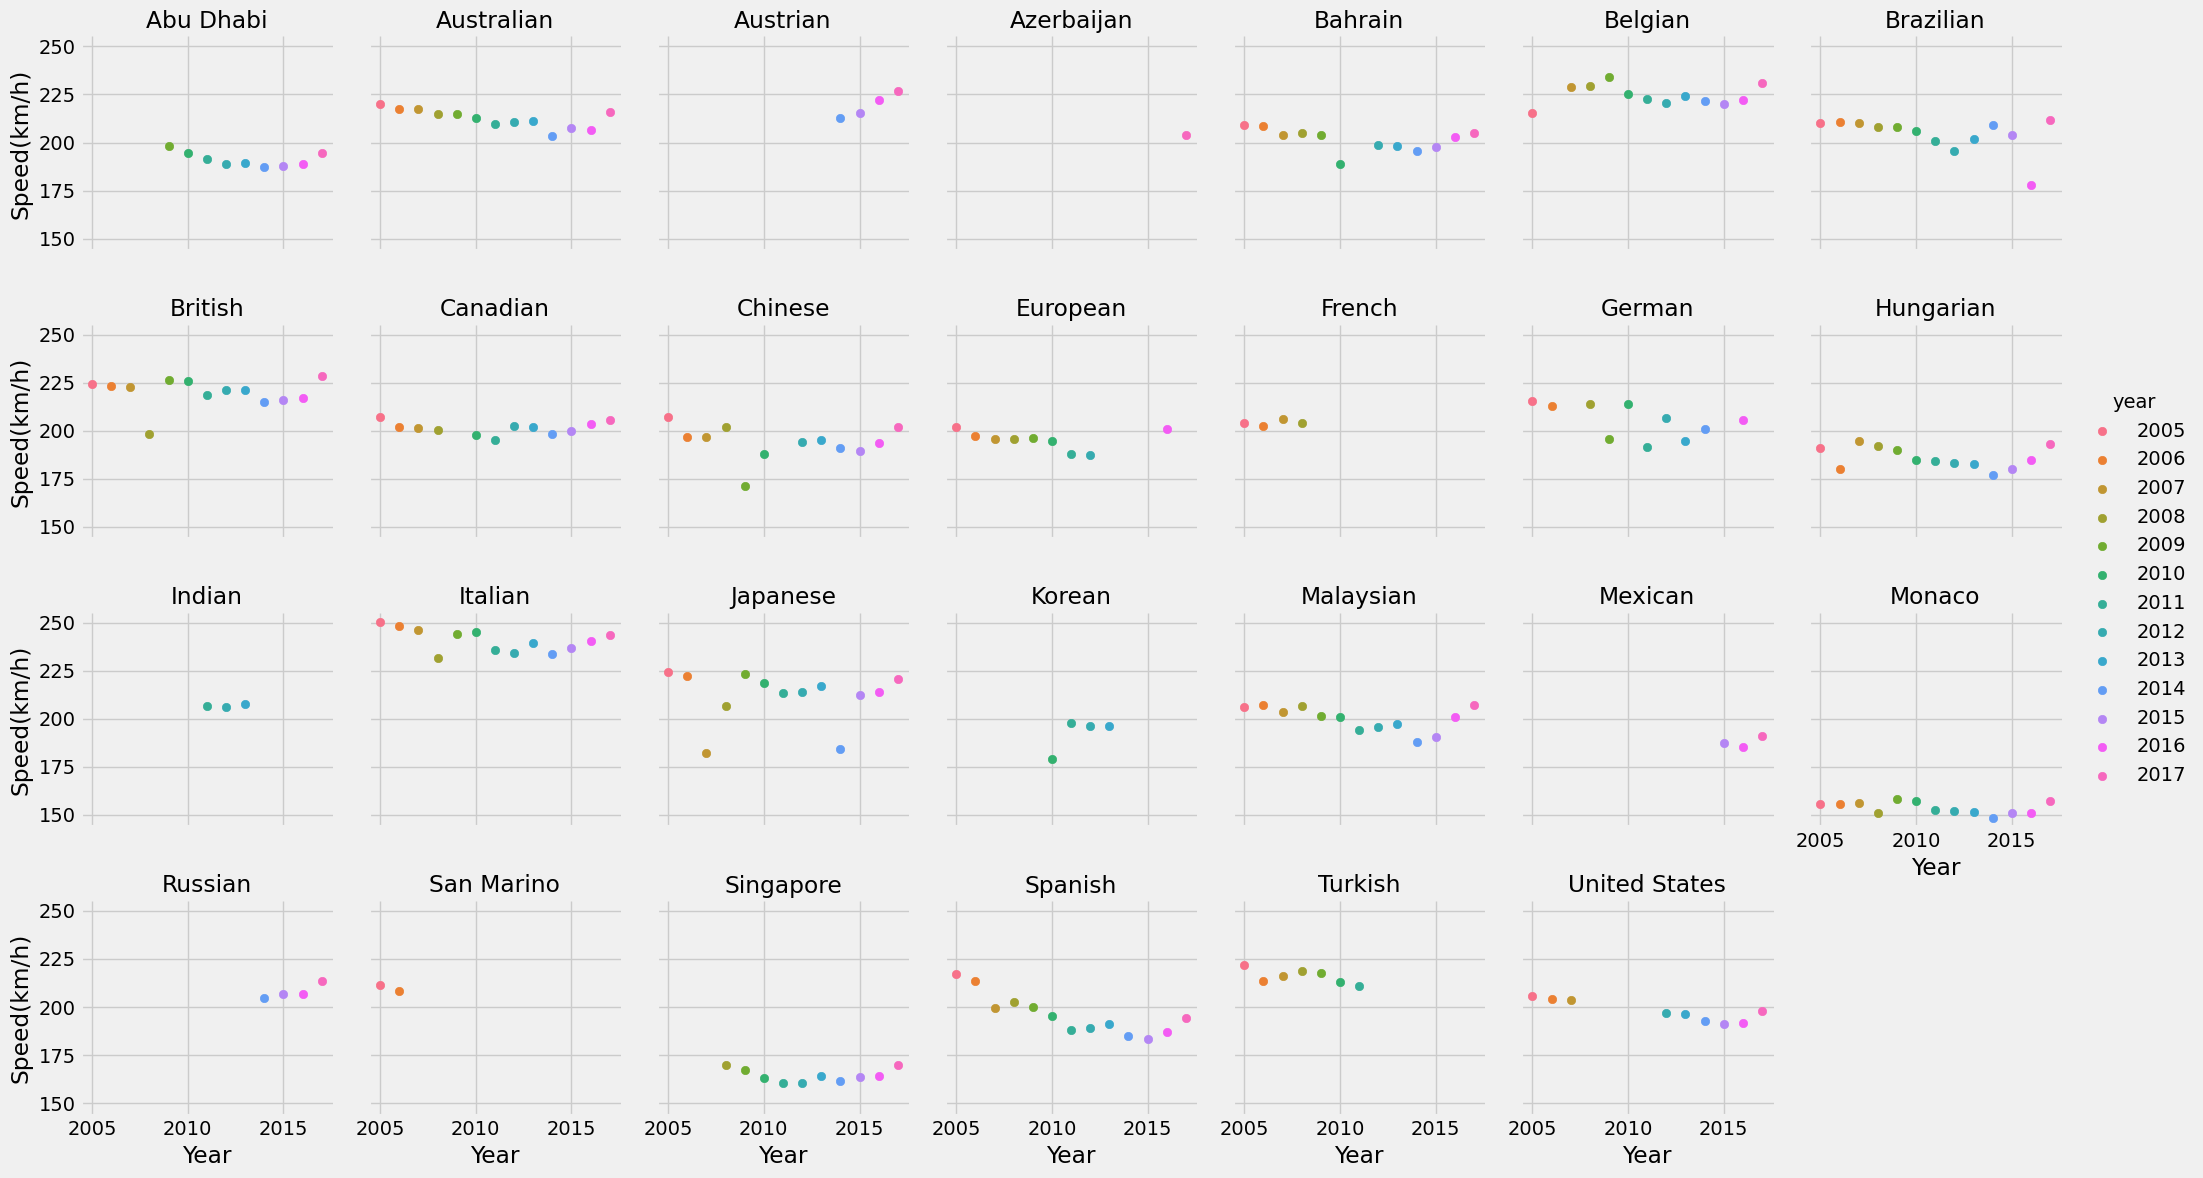

In [16]:
grid = sns.FacetGrid(vel_circs, col="name", col_wrap=7, height=3, hue="year")
grid.map(plt.scatter, "year", "fastestLapSpeed").add_legend()
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Year", "Speed(km/h)")

plt.show()

In [18]:
conductores = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\drivers.csv", encoding="ISO-8859-1")
conductores.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [19]:
conductores["dob"] = pd.to_datetime(conductores["dob"], format="mixed")

In [20]:
conductores["age"] = 2017 - conductores["dob"].dt.year
conductores.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,age
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-07-01,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,32.0
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-10-05,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,40.0
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,32.0
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,36.0
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,36.0


In [21]:
posicion_conductores = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\driverStandings.csv")
posicion_conductores.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [22]:
conductores = conductores.drop(columns="url")
conductores = pd.merge(conductores, posicion_conductores, on="driverId", how="left")

In [23]:
conductores_filt = conductores.drop(columns=["points","position", "positionText"])
conductores_filt.rename(columns={"number": "driver_number"}, inplace=True)

In [24]:
resultados_3 = pd.merge(resultados, conductores_filt, on=["driverId", "raceId"], how="left")

In [25]:
carreras_filt = carreras.drop(columns="time")

In [26]:
resultados_3 = pd.merge(resultados_3, carreras_filt, on="raceId", how="left")

In [27]:
resultados_3

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,nationality,age,driverStandingsId,wins,year,round,circuitId,name,date,url
0,1,18,1,1,22.0,1,1.0,1,1,10.0,...,British,32.0,1.0,1.0,2008,1,1,Australian,2008-03-16,http://en.wikipedia.org/wiki/2008_Australian_G...
1,2,18,2,2,3.0,5,2.0,2,2,8.0,...,German,40.0,2.0,0.0,2008,1,1,Australian,2008-03-16,http://en.wikipedia.org/wiki/2008_Australian_G...
2,3,18,3,3,7.0,7,3.0,3,3,6.0,...,German,32.0,3.0,0.0,2008,1,1,Australian,2008-03-16,http://en.wikipedia.org/wiki/2008_Australian_G...
3,4,18,4,4,5.0,11,4.0,4,4,5.0,...,Spanish,36.0,4.0,0.0,2008,1,1,Australian,2008-03-16,http://en.wikipedia.org/wiki/2008_Australian_G...
4,5,18,5,1,23.0,3,5.0,5,5,4.0,...,Finnish,36.0,5.0,0.0,2008,1,1,Australian,2008-03-16,http://en.wikipedia.org/wiki/2008_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777,988,842,5,10.0,17,16.0,16,16,0.0,...,French,21.0,68607.0,0.0,2017,20,24,Abu Dhabi,2017-11-26,https://en.wikipedia.org/wiki/2017_Abu_Dhabi_G...
23773,23778,988,828,15,9.0,19,17.0,17,17,0.0,...,Swedish,27.0,68601.0,0.0,2017,20,24,Abu Dhabi,2017-11-26,https://en.wikipedia.org/wiki/2017_Abu_Dhabi_G...
23774,23779,988,840,3,18.0,15,18.0,18,18,0.0,...,Canadian,19.0,68599.0,0.0,2017,20,24,Abu Dhabi,2017-11-26,https://en.wikipedia.org/wiki/2017_Abu_Dhabi_G...
23775,23780,988,832,4,55.0,12,NaN,R,19,0.0,...,Spanish,23.0,68591.0,0.0,2017,20,24,Abu Dhabi,2017-11-26,https://en.wikipedia.org/wiki/2017_Abu_Dhabi_G...


In [28]:
resultados_3 = pd.merge(resultados_3, circuitos, on="circuitId", how="left")

In [29]:
pos_1 = resultados_3[resultados_3["position"] == 1]

In [30]:
wins = pos_1.groupby(["driverRef"]).size().reset_index(name="victorias")
wins.sort_values(by="victorias", ascending=False, inplace=True)
wins = wins[wins["victorias"] > 2]
wins

,driverRef,victorias
62,michael_schumacher,91
37,hamilton,62
76,prost,51
100,vettel,47
90,senna,41
...,...,...
28,fisichella,3
30,frentzen,3
40,herbert,3
60,max_verstappen,3


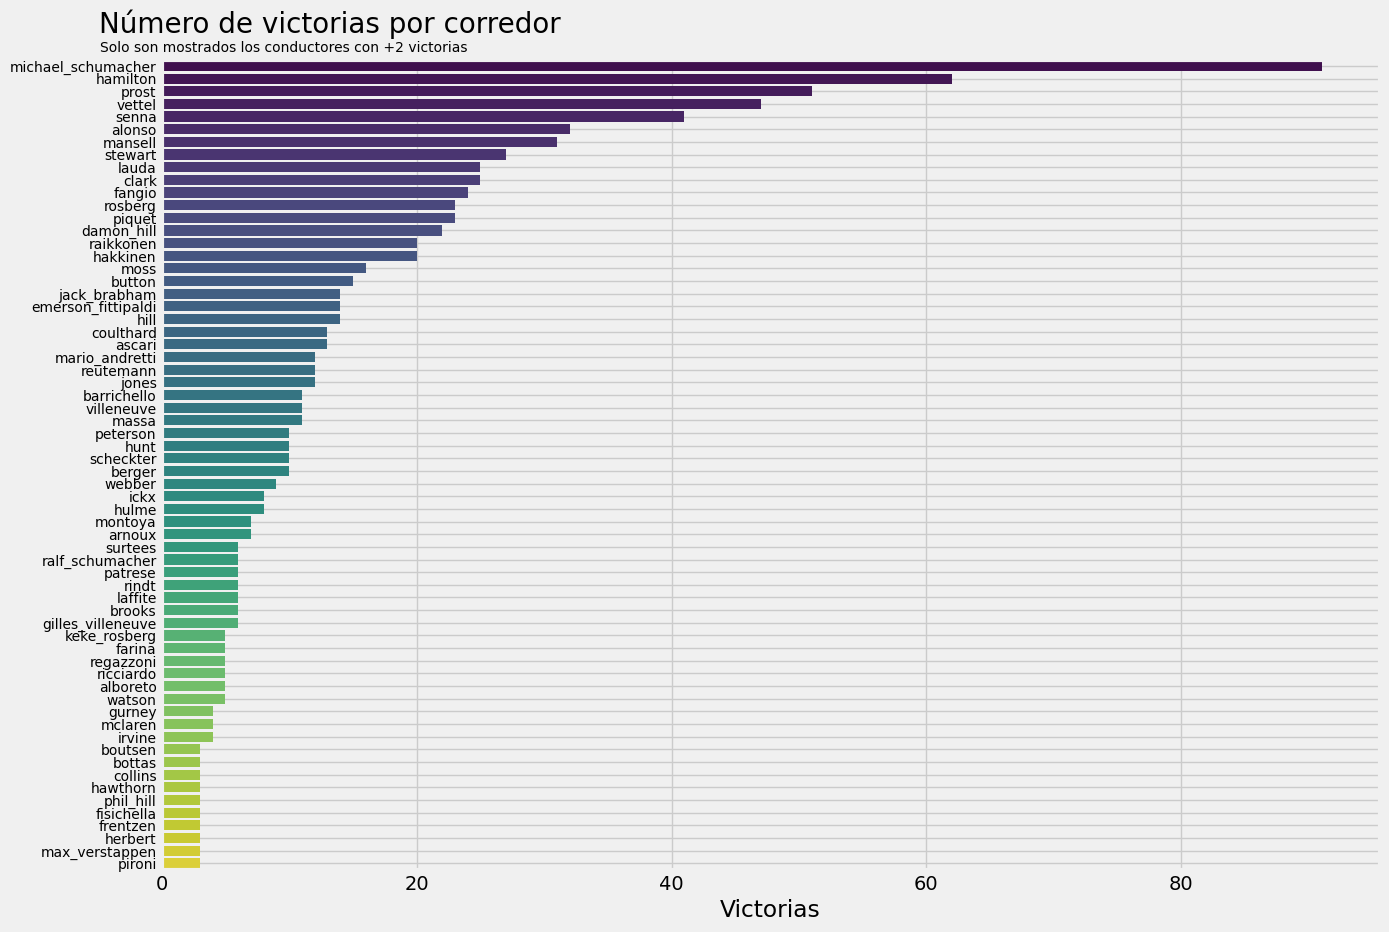

In [31]:
plt.figure(figsize=(14, 10))
sns.barplot(data=wins, x="victorias", y="driverRef", hue="driverRef", palette="viridis")
plt.title("Solo son mostrados los conductores con +2 victorias", fontsize=10, x=0.1)
plt.suptitle("Número de victorias por corredor", fontsize=20, x=0.2, y=0.93)
plt.xlabel("Victorias")
plt.ylabel(None)
plt.yticks(fontsize=10)

plt.grid(True)

plt.show()

In [32]:
constructores = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\constructors.csv")
constructores.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [33]:
posiciones_constructores = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\constructorStandings.csv")
posiciones_constructores.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Unnamed: 7
0,1,18,1,14.0,1,1,1,NaN
1,2,18,2,8.0,3,3,0,NaN
2,3,18,3,9.0,2,2,0,NaN
3,4,18,4,5.0,4,4,0,NaN
4,5,18,5,2.0,5,5,0,NaN


In [34]:
resultados_constructores = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\constructorResults.csv")
resultados_constructores.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


In [35]:
resultados_constructores = pd.merge(resultados_constructores, carreras, on="raceId",  how="left")

In [36]:
constructores = constructores.drop(columns=["url", "Unnamed: 5"], axis=1)

In [37]:
resultados_constructores = pd.merge(resultados_constructores, constructores, on="constructorId", how="left")

In [38]:
posiciones_constructores = posiciones_constructores.drop(columns="Unnamed: 7")

In [39]:
resultados_constructores = pd.merge(resultados_constructores, posiciones_constructores, on=["constructorId", "raceId"], how="left")

In [40]:
primeros = resultados_constructores[resultados_constructores["wins"] == 1]

In [41]:
primeros = primeros.rename(columns={"name_x":"name", "name_y":"name_constructor"})

In [42]:
wins = primeros.groupby("name_constructor").size().reset_index(name="victorias")
wins = wins[wins["victorias"] > 0]
wins.sort_values(by="victorias", ascending=False, inplace=True)

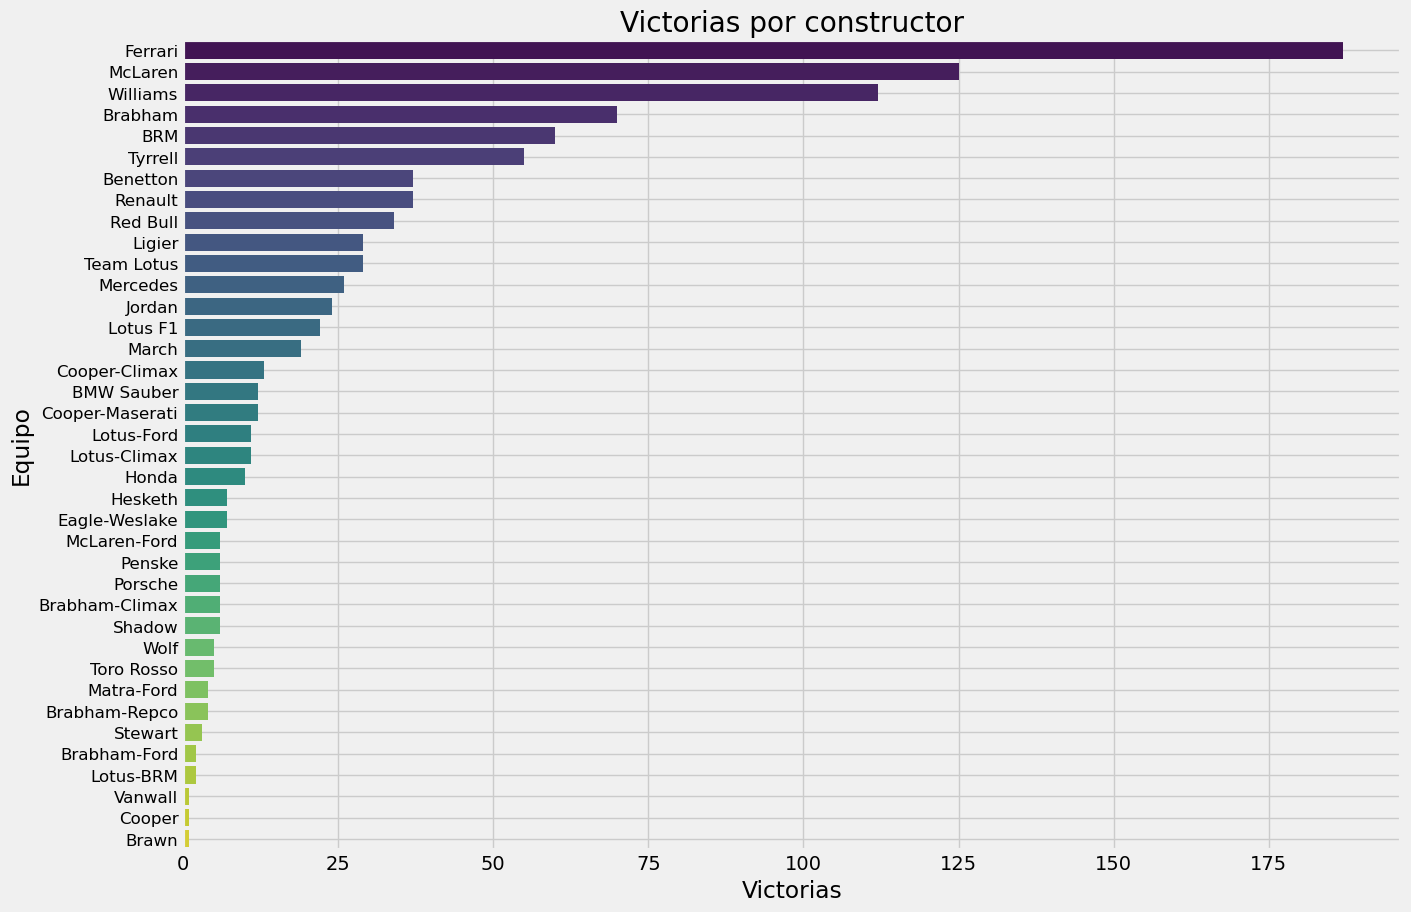

In [43]:
plt.figure(figsize=(14, 10))
sns.barplot(data=wins, x="victorias", y="name_constructor", hue="name_constructor", palette="viridis")
plt.title("Victorias por constructor")
plt.xlabel("Victorias")
plt.ylabel("Equipo")
plt.yticks(fontsize=12)

plt.grid(True)

plt.show()

In [44]:
victorias_por_año = primeros.groupby(["name_constructor", "year"]).size().reset_index(name="Victorias")
top_5 = victorias_por_año[victorias_por_año["name_constructor"].isin(["Ferrari", "McLaren", "Williams", "Brabham", "BRM"])]
top_5 = top_5.pivot_table(index='year', columns='name_constructor', values='Victorias')

In [45]:
proporciones = top_5.div(top_5.sum(axis=1), axis=0)
proporciones

name_constructor,BRM,Brabham,Ferrari,McLaren,Williams
year,,,,,
1958,NaN,NaN,1.000000,NaN,NaN
1959,0.833333,NaN,0.166667,NaN,NaN
1960,NaN,NaN,1.000000,NaN,NaN
1961,NaN,NaN,1.000000,NaN,NaN
1962,1.000000,NaN,NaN,NaN,NaN
1963,0.583333,NaN,0.416667,NaN,NaN
1964,0.888889,NaN,0.111111,NaN,NaN
1965,1.000000,NaN,NaN,NaN,NaN
1966,0.692308,NaN,0.307692,NaN,NaN


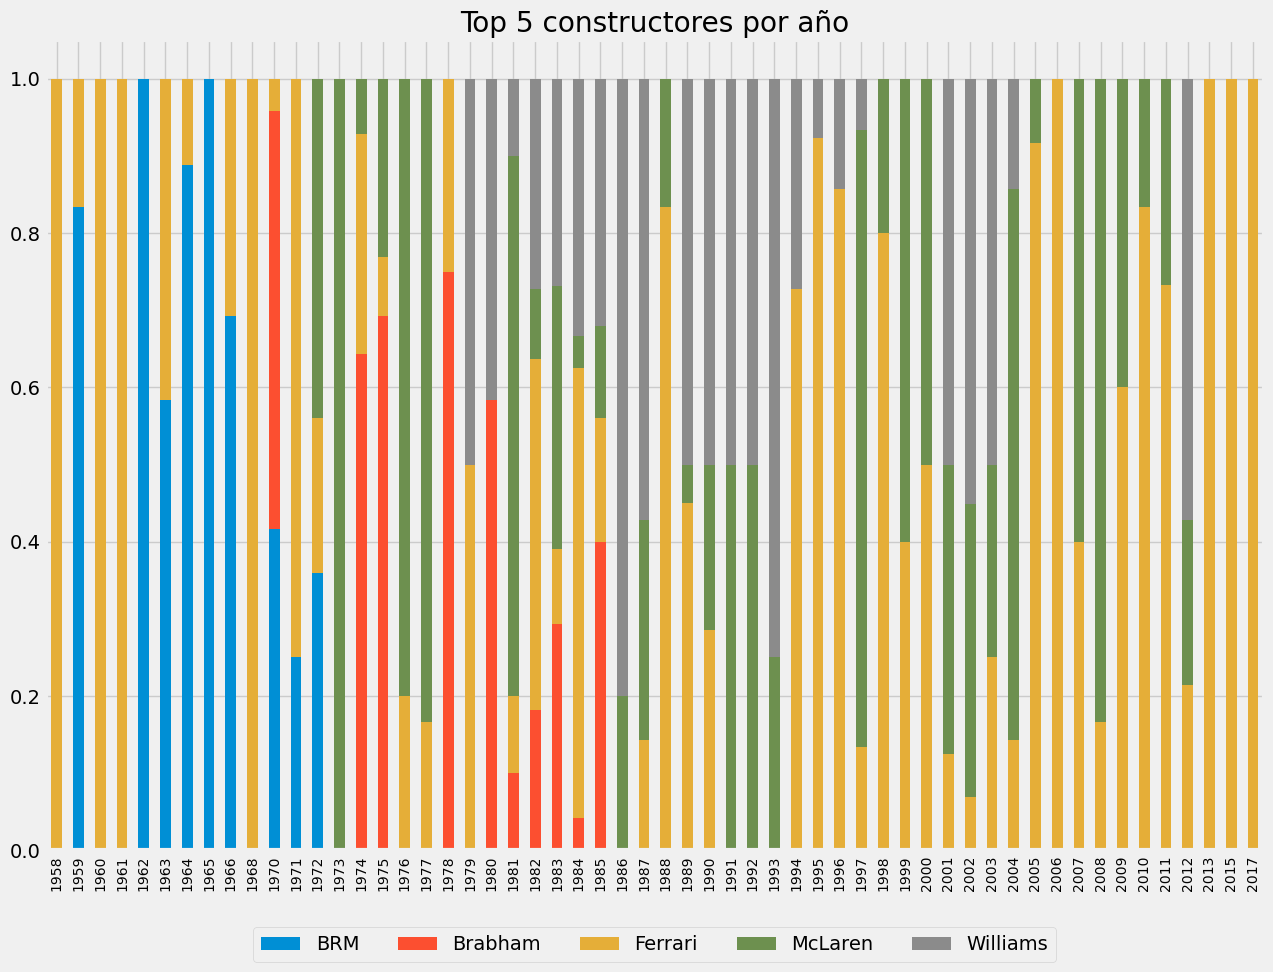

In [46]:
proporciones.plot(kind="bar", stacked=True, figsize=(14, 10))
plt.title("Top 5 constructores por año")
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.show()

In [62]:
year_1988 = resultados_3[resultados_3["driverRef"].isin(["prost", "senna"])][resultados_3["year"] == 1988]

C:\Users\Educa informatica\AppData\Local\Temp\ipykernel_13884\4224633700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year_1988 = resultados_3[resultados_3["driverRef"].isin(["prost", "senna"])][resultados_3["year"] == 1988]


In [77]:
year_1988 = year_1988[["date", "driverRef", "points"]]

In [78]:
year_1988["win_race"] = year_1988["points"].apply(lambda x: "yes" if x == 9 else "no")
year_1988["current"] = year_1988.groupby("driverRef")["points"].cumsum()

In [63]:
year_1989 = resultados_3[resultados_3["driverRef"].isin(["prost", "senna"])][resultados_3["year"] == 1989]

C:\Users\Educa informatica\AppData\Local\Temp\ipykernel_13884\4046875470.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year_1989 = resultados_3[resultados_3["driverRef"].isin(["prost", "senna"])][resultados_3["year"] == 1989]


In [69]:
year_1989 = year_1989[["date", "driverRef", "points"]]

In [70]:
year_1989["win_race"] = year_1989["points"].apply(lambda x: "yes" if x == 9 else "no")
year_1989["current"] = year_1989.groupby("driverRef")["points"].cumsum()

C:\Users\Educa informatica\AppData\Local\Temp\ipykernel_13884\3868748739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1989["win_race"] = year_1989["points"].apply(lambda x: "yes" if x == 9 else "no")
C:\Users\Educa informatica\AppData\Local\Temp\ipykernel_13884\3868748739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1989["current"] = year_1989.groupby("driverRef")["points"].cumsum()


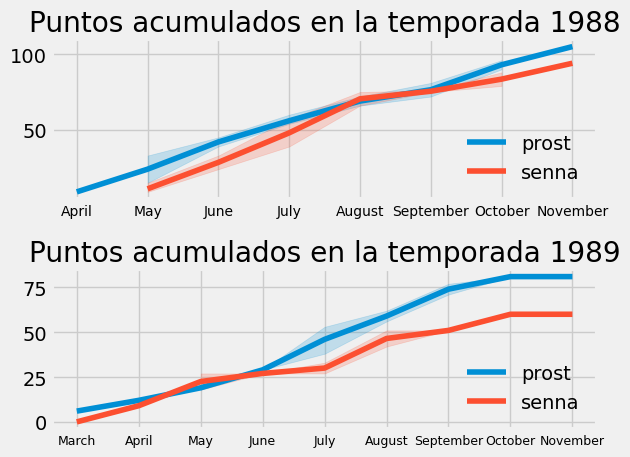

In [80]:
fig, ax = plt.subplots(2, 1)
sns.lineplot(data=year_1988, x=year_1988["date"].dt.month_name(), y="current", hue="driverRef", ax=ax[0])
ax[0].set(
    title = "Puntos acumulados en la temporada 1988",
    xlabel = None,
    ylabel = None
    )
ax[0].tick_params(axis="x", labelsize=10)
ax[0].legend(loc="lower right", frameon=False)

sns.lineplot(data=year_1989, x=year_1989["date"].dt.month_name(), y="current", hue="driverRef", ax=ax[1])
ax[1].set(
    title = "Puntos acumulados en la temporada 1989",
    xlabel = None,
    ylabel = None
    )
ax[1].tick_params(axis="x", labelsize=9)
ax[1].legend(loc="lower right", frameon=False)

plt.tight_layout()

plt.show()